## ADS505 Final Project
## Dataset: Hotel Reservations
## Vivian Do, Mirna Philip, Halee Staggs


### Attribute Description

| Column Name                           | Description                                                                                      |
|---------------------------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID                            | Unique identifier of each booking                                                                |
| no_of_adults                          | Number of adults                                                                                 |
| no_of_children                        | Number of Children                                                                               |
| no_of_weekend_nights                  | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  |
| no_of_week_nights                     | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel      |
| type_of_meal_plan                     | Type of meal plan booked by the customer                                                         |
| required_car_parking_space            | Does the customer require a car parking space? (0 - No, 1- Yes)                                   |
| room_type_reserved                    | Type of room reserved by the customer                                                             |
| lead_time                             | Number of days between the date of booking and the arrival date                                   |
| arrival_year                          | Year of arrival date                                                                             |
| arrival_month                         | Month of arrival date                                                                            |
| arrival_date                          | Date of the month                                                                                |
| market_segment_type                   | Market segment designation                                                                       |
| repeated_guest                        | Is the customer a repeated guest? (0 - No, 1- Yes)                                               |
| no_of_previous_cancellations          | Number of previous bookings that were canceled by the customer prior to the current booking     |
| no_of_previous_bookings_not_canceled  | Number of previous bookings not canceled by the customer prior to the current booking           |
| avg_price_per_room                    | Average price per day of the reservation; prices of the rooms are dynamic (in euros)            |
| no_of_special_requests                | Total number of special requests made by the customer                                            |
| booking_status                        | Flag indicating if the booking was canceled or not                                               |


### Library and Data Import

In [114]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,  roc_auc_score, roc_curve
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install imblearn
from imblearn.metrics import specificity_score, sensitivity_score


In [115]:
#!pip install ipympl
import ipympl

In [116]:
#uploating the dataset
df = pd.read_csv('/content/drive/MyDrive/DS_for_business/project/Hotel Reservations.csv')
# display of first three rows  in the dataframe
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

### Understanding the dataset

In [117]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [118]:
# Dimensions: 36275 observations and 19 variables
df.shape

(36275, 19)

In [119]:
#Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [120]:
#The sum count of the duplicated values
df.duplicated().sum()

0

In [121]:
#df.describe() provides statistics such as the mean, minimum, standard deviation, and more.
df.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

Numerical Data Insights

In [122]:
#Data from children?
adult_zero = pd.DataFrame(df[df['no_of_adults'] == 0])
adult_zero['booking_status'].value_counts()

Not_Canceled    95
Canceled        44
Name: booking_status, dtype: int64

In [123]:
#Check for rows that report no adults or children
both = pd.DataFrame(df[(df['no_of_adults'] == 0) & (df['no_of_children'] == 0)])
both['booking_status'].value_counts()  # None

Series([], Name: booking_status, dtype: int64)

In [124]:
#Check if any reservations report being not a week or weekend day
#Small amount of sample has no data for weekdays or weeknights
#Can maybe impute with median
no_day_type = pd.DataFrame(df[(df['no_of_weekend_nights'] == 0) & (df['no_of_week_nights'] == 0)])
no_day_type['booking_status'].value_counts()  # Drop these later

Not_Canceled    76
Canceled         2
Name: booking_status, dtype: int64

Categorical Data Insights

In [125]:
# Distribution of outcome variable -- Class imbalance, needs to be addressed in training set
print(df['booking_status'].value_counts())
print('\n',df['booking_status'].value_counts()/len(df))

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

 Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64


Arrival Year

In [126]:
# Data spans two years (2017-2018)
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

Text(0.5, 1.0, 'Arrival Year by Booking Status')

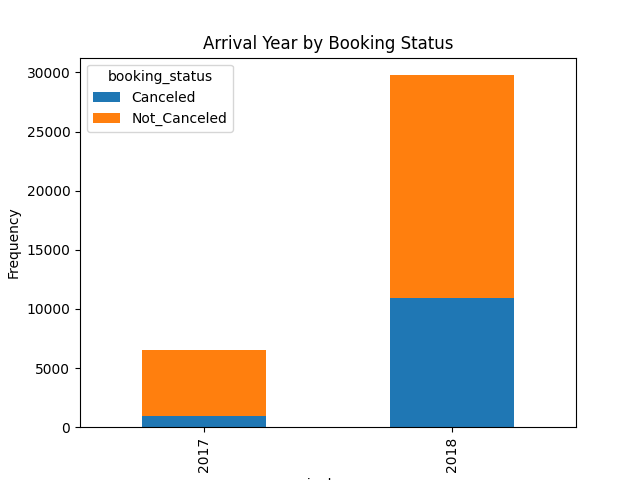

In [127]:
pd.crosstab(df['arrival_year'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Arrival Year by Booking Status')

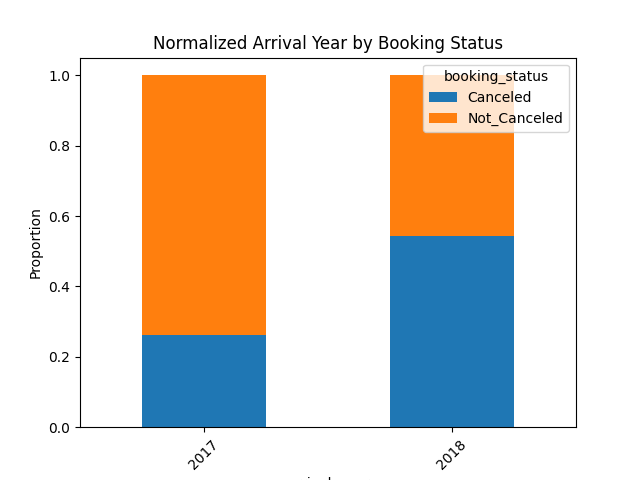

In [128]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['arrival_year'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Arrival Year by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Car Parking Space

In [129]:
df['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

Text(0.5, 1.0, 'Parking Space by Booking Status')

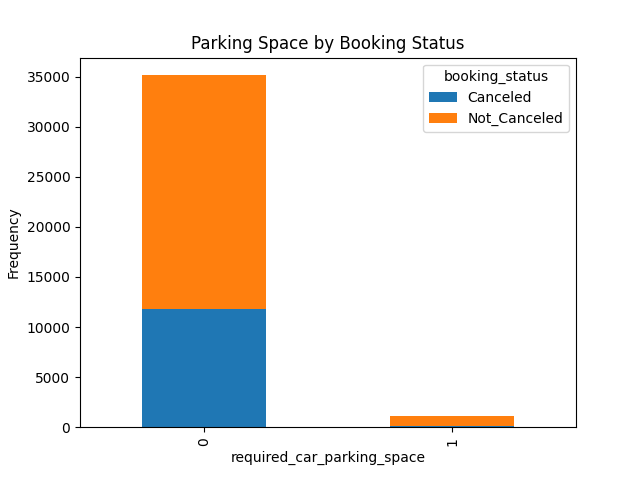

In [130]:
pd.crosstab(df['required_car_parking_space'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Parking Space by Booking Status')

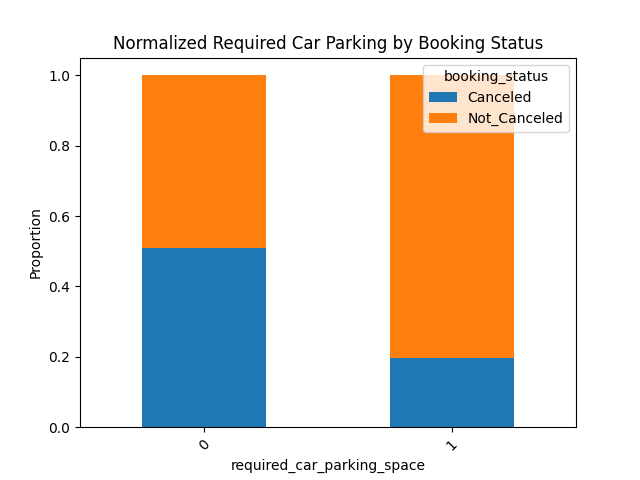

In [131]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['required_car_parking_space'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Required Car Parking by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Repeated Guest

In [132]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

Text(0.5, 1.0, 'Repeated Guest by Booking Status')

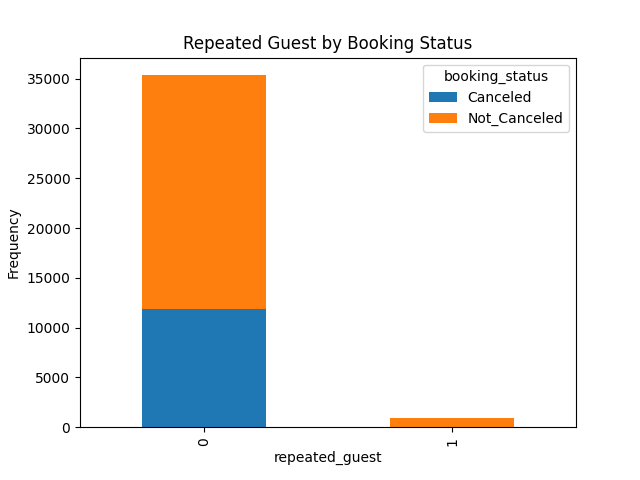

In [133]:
pd.crosstab(df['repeated_guest'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Repeated Guest by Booking Status')

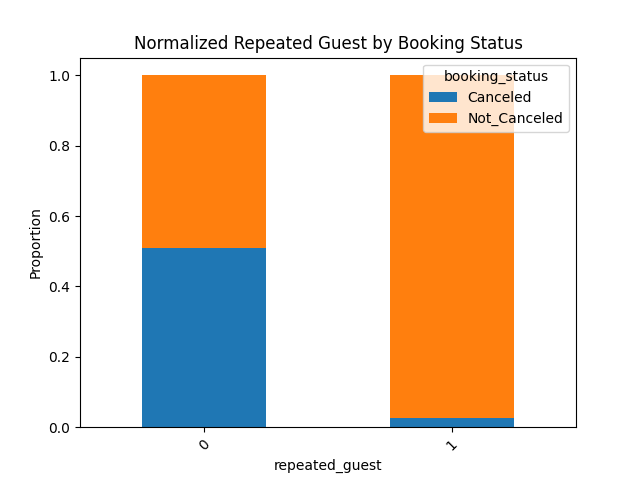

In [134]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['repeated_guest'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Repeated Guest by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Arrival Month

In [135]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

Text(0.5, 1.0, 'Arrival Month by Booking Status')

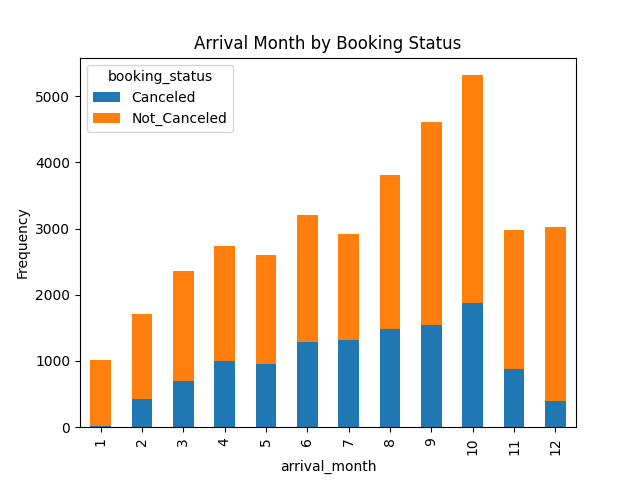

In [136]:
pd.crosstab(df['arrival_month'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Arrival Month by Booking Status')

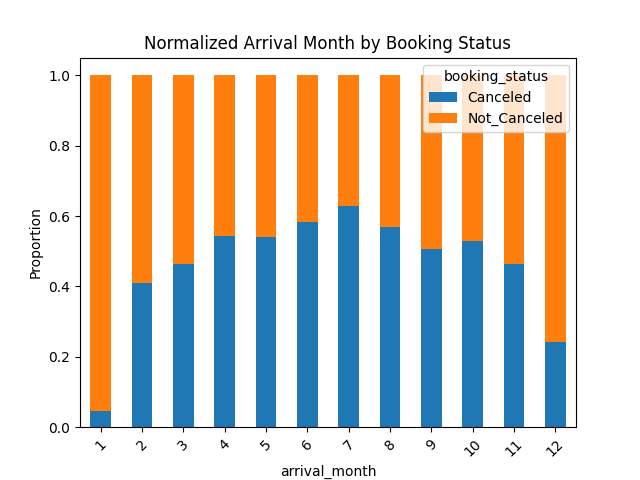

In [137]:
# Normalized bar chart
cross_tab = pd.crosstab(index=df['arrival_month'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Arrival Month by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Meal Plan

In [138]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Text(0.5, 1.0, 'Meal Plan by Booking Status')

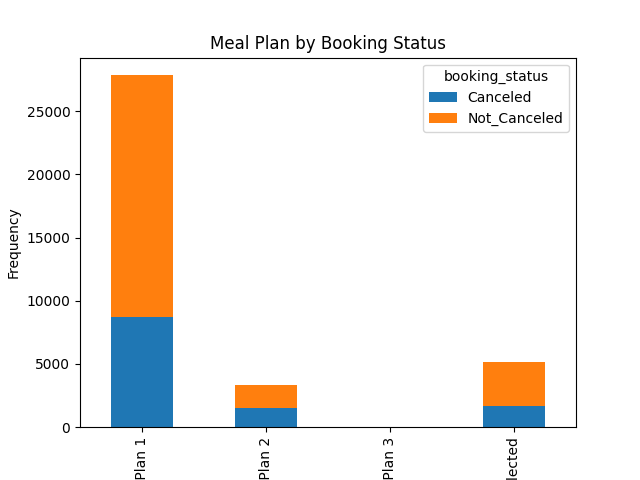

In [139]:
pd.crosstab(df['type_of_meal_plan'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Meal Plan by Booking Status')

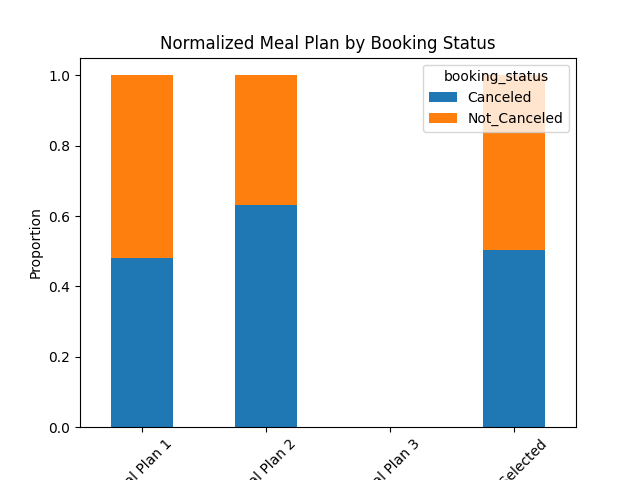

In [140]:
# Normalized bar chart
cross_tab = pd.crosstab(index=df['type_of_meal_plan'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Meal Plan by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Room Type

In [141]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Text(0.5, 1.0, 'Room Type by Booking Status')

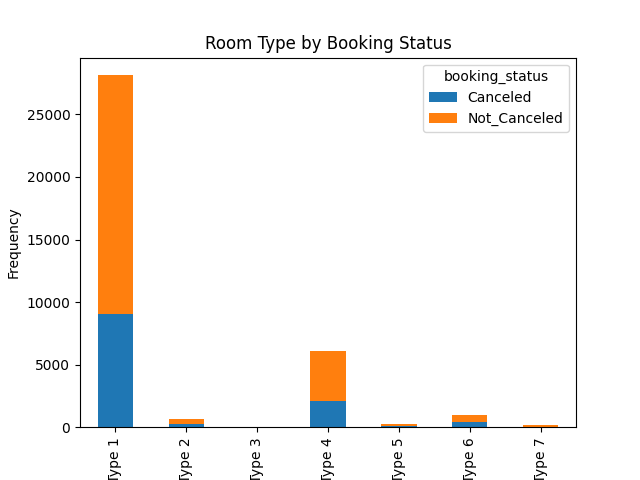

In [142]:
pd.crosstab(df['room_type_reserved'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Room Type by Booking Status')

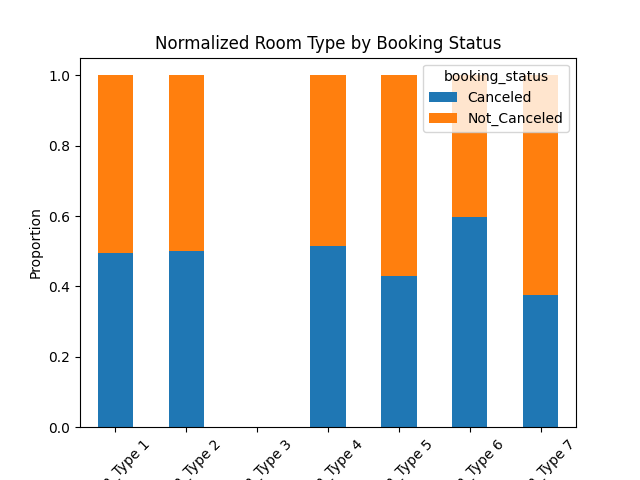

In [143]:
# Normalized bar chart
cross_tab = pd.crosstab(index=df['room_type_reserved'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Room Type by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

In [144]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Text(0.5, 1.0, 'Market Segment by Booking Status')

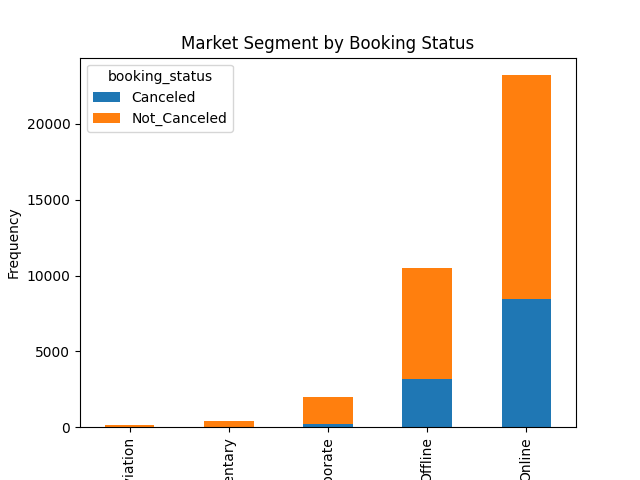

In [145]:
pd.crosstab(df['market_segment_type'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Market Segment by Booking Status')

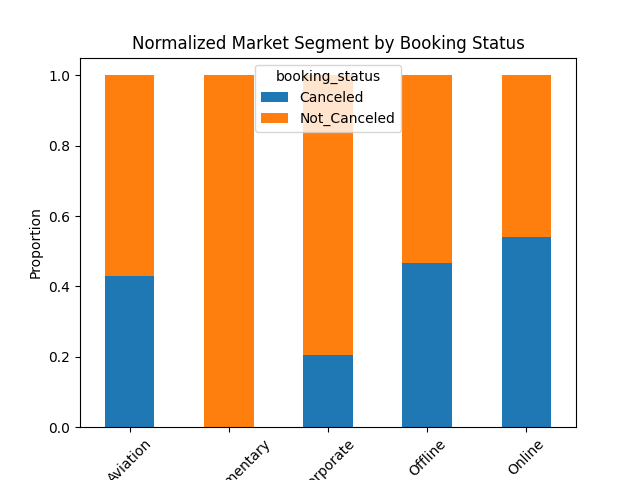

In [146]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['market_segment_type'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Market Segment by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

## Data Preparation

In [147]:
# Drop non-predictors
df=df.drop(['Booking_ID'],axis=1)

In [148]:
# Convert columns to correct datatypes

# Categorical='object'/'category'
# Numerical='int'/'float'
df['type_of_meal_plan']=df['type_of_meal_plan'].astype('category')
df['required_car_parking_space']=df['required_car_parking_space'].astype('category')
df['room_type_reserved']=df['room_type_reserved'].astype('category')
df['arrival_year']=df['arrival_year'].astype('category')
df['arrival_month']=df['arrival_month'].astype('category')
df['market_segment_type']=df['market_segment_type'].astype('category')
df['repeated_guest']=df['repeated_guest'].astype('category')
df['booking_status']=df['booking_status'].astype('category')

# Show all categorical data
print('Categorical attributes \n',df.select_dtypes(include=['category']).columns)

# Show all numerical data
print('\n Numerical attributes \n',df.select_dtypes(include=['integer','float']).columns)

Categorical attributes 
 Index(['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
       'arrival_year', 'arrival_month', 'market_segment_type',
       'repeated_guest', 'booking_status'],
      dtype='object')

 Numerical attributes 
 Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time', 'arrival_date',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')


### **Outlier**

### Feature Engineering

1. Calculate cancellation rate based on the number of previous cancellations out of all bookings

In [149]:
df['cancellation_rate']=df['no_of_previous_cancellations']/((df['no_of_previous_cancellations'])+(df['no_of_previous_bookings_not_canceled']))
df['cancellation_rate']=df['cancellation_rate'].astype('float64')
df['cancellation_rate'].value_counts()

0.000000    592
1.000000    118
0.166667     16
0.200000     15
0.333333     15
           ... 
0.089286      1
0.120000      1
0.075000      1
0.078947      1
0.190476      1
Name: cancellation_rate, Length: 81, dtype: int64

The cancellation rate uses historic bookings to calculate the guest's overall rate of bookings fulfilled, where 0 = a customer has fulfilled every booking and 1 = a customer has canceled every booking.

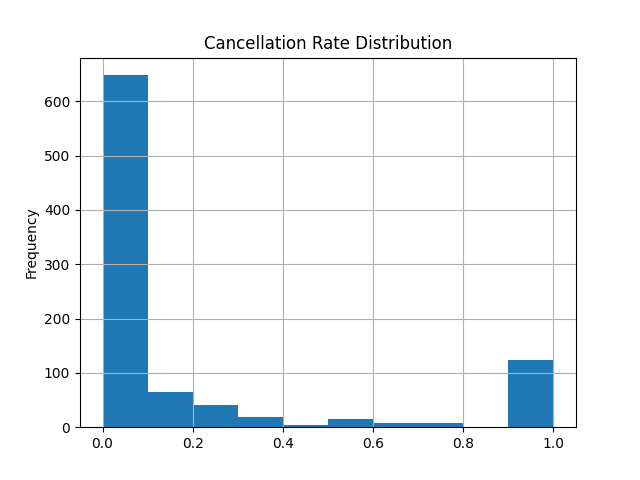

In [150]:
# Show distribution
df.hist('cancellation_rate')
plt.ylabel('Frequency')
plt.title('Cancellation Rate Distribution')
plt.show()


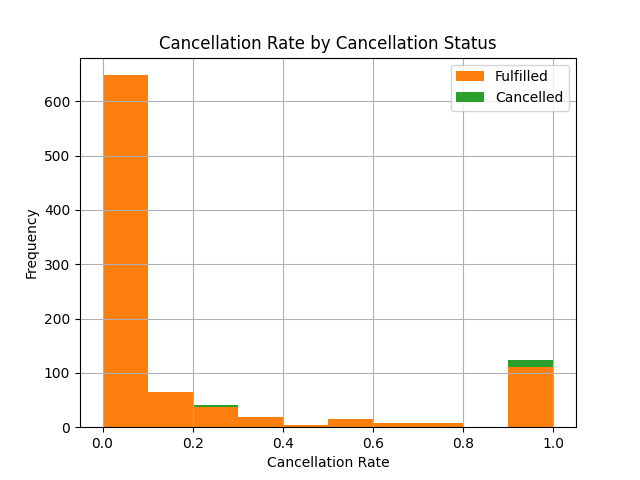

In [151]:
y1 = list(df[df['booking_status'] == 'Canceled']['cancellation_rate'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['cancellation_rate'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Cancellation Rate')
plt.ylabel('Frequency')
plt.title('Cancellation Rate by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

2. Get full arrival date by combining year, month, and day

In [152]:
# Combine year, month, day into 1 column in datetime format ('full_arrival_date')
df['day']=df['arrival_date'].copy()
df['month']=df['arrival_month'].copy()
df['year']=df['arrival_year'].copy()
df['full_arrival_date']=pd.to_datetime(df[['year','month','day']],format='%Y-%M-%D',errors='coerce')

3. Get total number of guests

In [153]:
df['total_guests']=df['no_of_adults']+df['no_of_children']

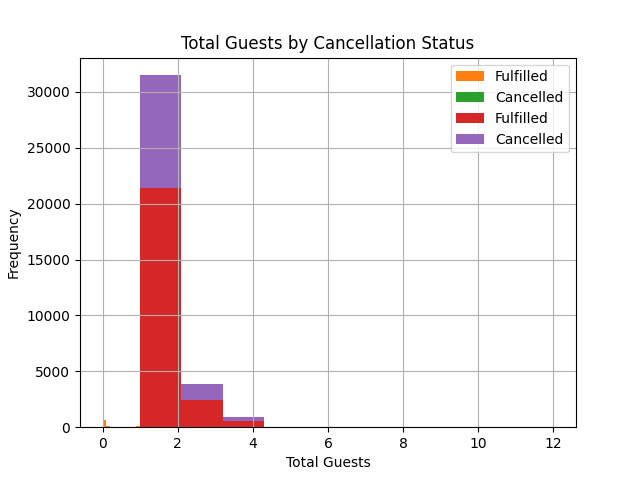

In [154]:
y1 = list(df[df['booking_status'] == 'Canceled']['total_guests'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_guests'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Guests')
plt.ylabel('Frequency')
plt.title('Total Guests by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

4. Get total number of nights for each booking

In [155]:
df['total_nights']=df['no_of_weekend_nights']+df['no_of_week_nights']

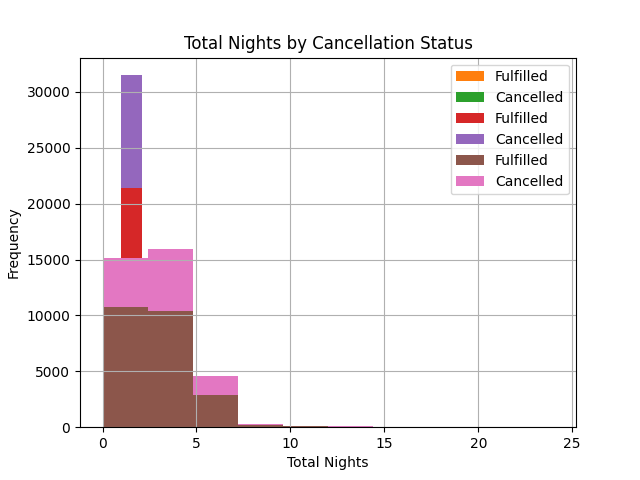

In [156]:
y1 = list(df[df['booking_status'] == 'Canceled']['total_nights'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_nights'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Nights')
plt.ylabel('Frequency')
plt.title('Total Nights by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

5. Get seasonality from arrival month

In [157]:
def map_to_season(month):
    if month in [12,1,2]:
        return 'Winter'
    elif month in [3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Autumn'
    else:
        return 'Unknown'  # Handle any unexpected values

# Apply mapping function to create a new 'season' column
df['season'] = df['arrival_month'].apply(map_to_season)
df['season']=df['season'].astype('category')
df['season'].value_counts()

Autumn    12908
Summer     9936
Spring     7692
Winter     5739
Name: season, dtype: int64

Text(0.5, 1.0, 'Season by Booking Status')

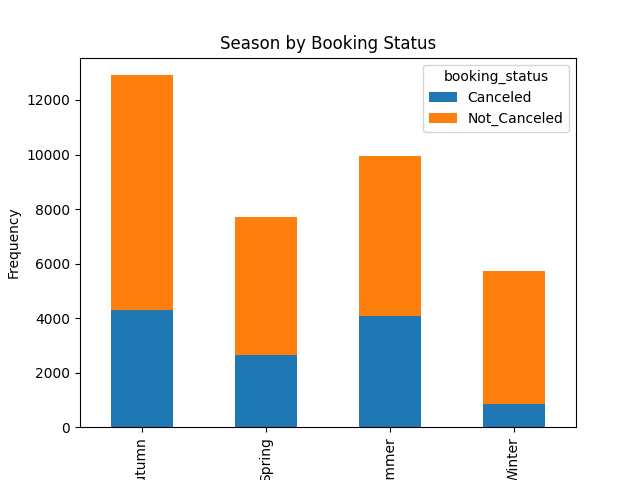

In [158]:
pd.crosstab(df['season'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Season by Booking Status')

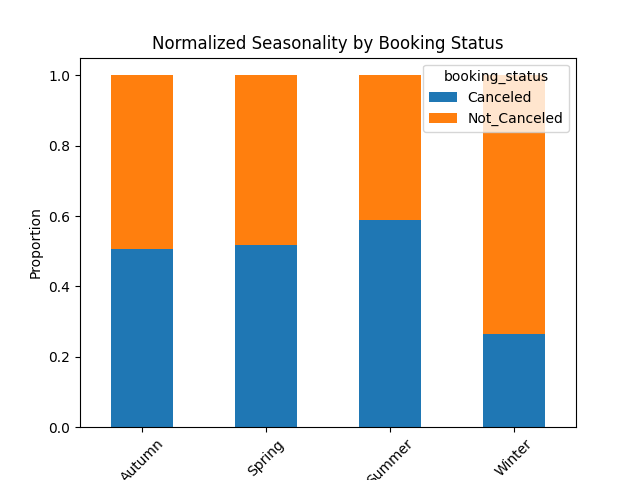

In [159]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['season'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Seasonality by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

6. Past Customer (0 - No, 1 - Yes)

In [160]:
#Update to binary variable: 0 - not past customer, 1 - past customer
df['no_of_previous_bookings_not_canceled'].value_counts()

0     35463
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: no_of_previous_bookings_not_canceled, dtype: int64

In [161]:
df['past_customer'] = df['no_of_previous_bookings_not_canceled'].apply(lambda x: 1 if x > 0 else 0)
df['past_customer']=df['past_customer'].astype('category')

Text(0.5, 1.0, 'Past Customer by Booking Status')

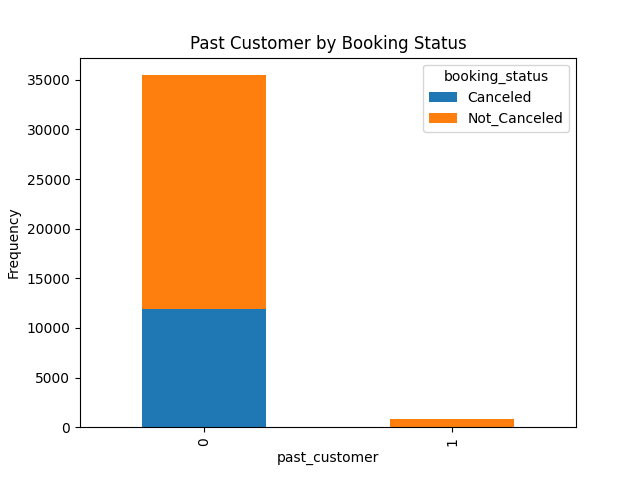

In [162]:
pd.crosstab(df['past_customer'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Past Customer by Booking Status')

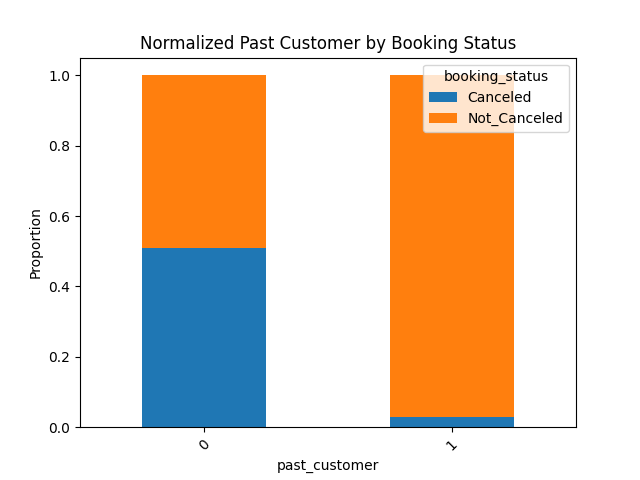

In [163]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['past_customer'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Past Customer by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

Past guests have a lower cancellation rate

7. Past Cancellation (0- No, 1-Yes)

In [164]:
# Show value counts
df['no_of_previous_cancellations'].value_counts()


0     35937
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: no_of_previous_cancellations, dtype: int64

Most guests did not have a previous cancellation. We will convert this numerical variable to a binary variable where:

    * 0 = guest did not have a previous cancellation
    * 1 = guest had at least 1 previous cancellation

In [165]:
# Make binary; 0=no past cancellations, 1=at least 1 past cancellation
df['past_cancellation'] = df['no_of_previous_cancellations'].apply(lambda x: 1 if x > 0 else 0)
df['past_cancellation']=df['past_cancellation'].astype('category')

Text(0.5, 1.0, 'Past Cancellation by Booking Status')

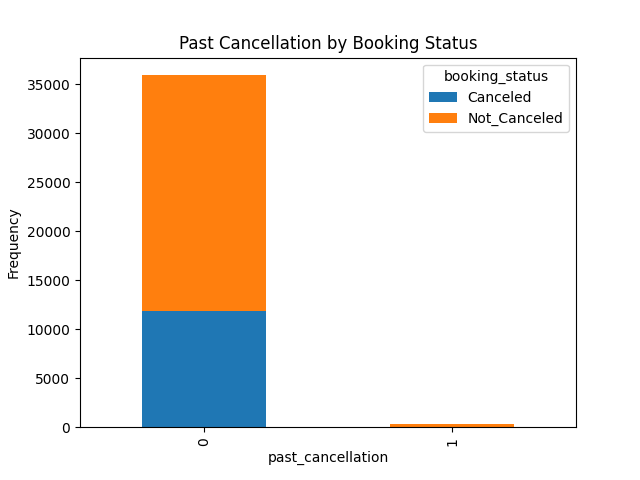

In [166]:
pd.crosstab(df['past_cancellation'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Past Cancellation by Booking Status')

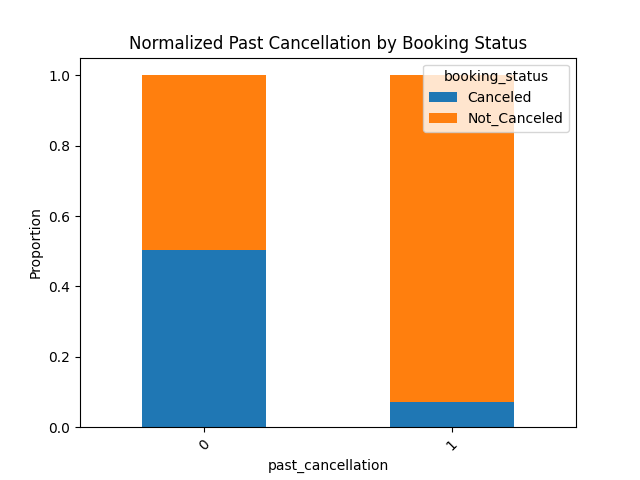

In [167]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['past_cancellation'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Past Cancellation by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

8. Total Reservation Price

In [168]:
df['total_price'] = pd.array(df['total_nights'])*pd.array(df['avg_price_per_room'])

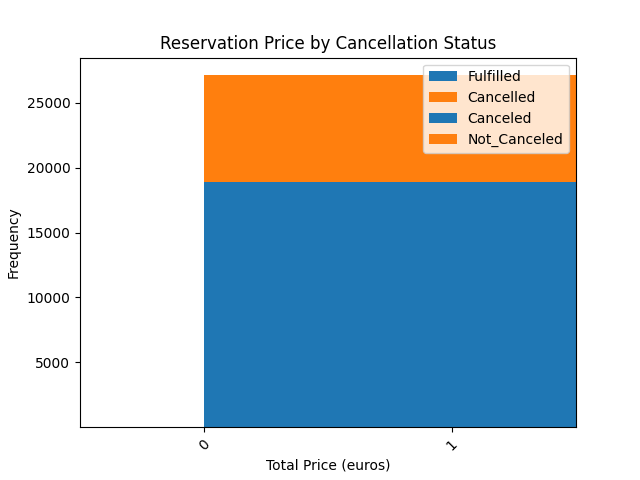

In [169]:
y1 = list(df[df['booking_status'] == 'Canceled']['total_price'])
y0 = list(df[df['booking_status'] == 'Not_Canceled']['total_price'])
names = ['Fulfilled','Cancelled']
plt.hist([y0,y1], label=names, stacked = True)
plt.xlabel('Total Price (euros)')
plt.ylabel('Frequency')
plt.title('Reservation Price by Cancellation Status')
plt.legend(loc='upper right')
plt.show()

9. Meal plan as binary

In [170]:
df['meal_plan'] = df['type_of_meal_plan'].apply(lambda x: 0 if x == 'Not Selected' else 1)
df['meal_plan']=df['meal_plan'].astype('category')

Text(0.5, 1.0, 'Meal Plan by Booking Status')

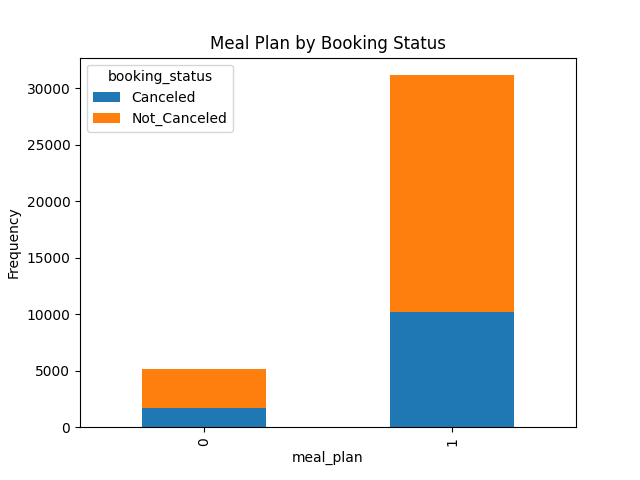

In [171]:
pd.crosstab(df['meal_plan'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Meal Plan by Booking Status')

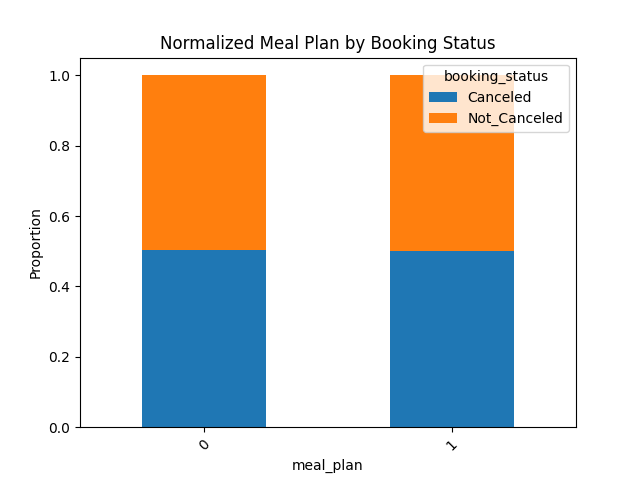

In [172]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['meal_plan'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Meal Plan by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

No significant difference between guests that selected a meal plan compared to guests that didn't.

10. Room type as binary

In [173]:
df['room_type'] = df['room_type_reserved'].apply(lambda x: 1 if x == 'Room_Type 1' else 0)
df['room_type']=df['room_type'].astype('category')

Text(0.5, 1.0, 'Room Type by Booking Status')

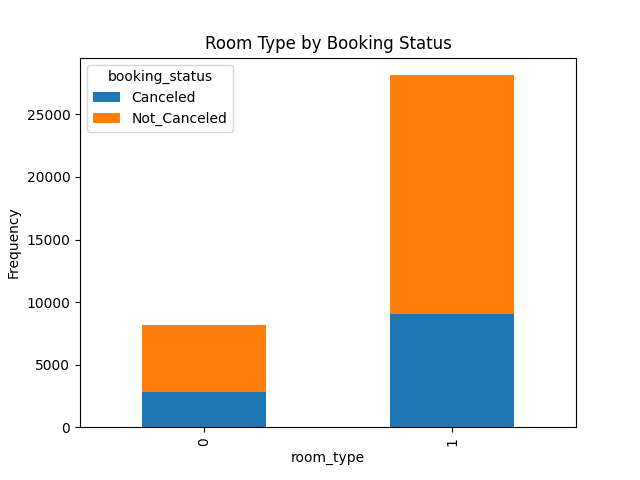

In [174]:
pd.crosstab(df['room_type'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Room Type by Booking Status')

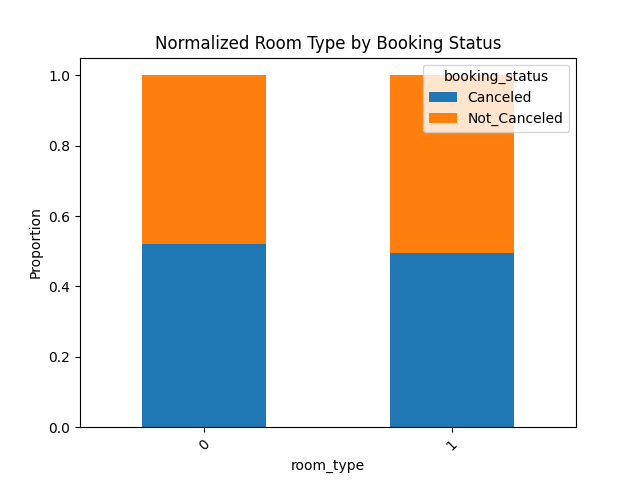

In [175]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['room_type'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Room Type by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

No significant difference between room types chosen

11. Market Segment As Three Level Variable

In [176]:
seg_df = df['market_segment_type'].value_counts().to_frame()
#Create bins based on frequency of each vehicle type and label based on popularity
seg_df['seg_bin'] = pd.cut(seg_df['market_segment_type'], bins = [0,2018,10529,23215], labels = ['Other','Offline','Online'])
#Add vehicle type ID as a variable
seg_df['index'] = seg_df.index
seg_dict = {pd.array(seg_df['index'])[i]: pd.array(seg_df['seg_bin'])[i] for i in range(len(pd.array(seg_df['index'])))}
df['segment'] = df['market_segment_type'].map(seg_dict)

In [177]:
df['segment'] = df['segment'].astype('category')
df['segment'].value_counts()

Online     23214
Offline    10528
Other       2533
Name: segment, dtype: int64

Text(0.5, 1.0, 'Market Segment by Cancellation Status')

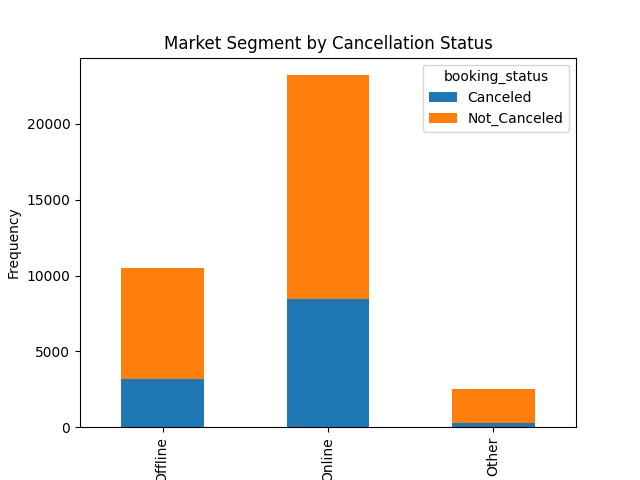

In [178]:
pd.crosstab(df['segment'], df['booking_status']).plot(kind='bar', stacked=True)
plt.ylabel('Frequency')
plt.title('Market Segment by Cancellation Status')

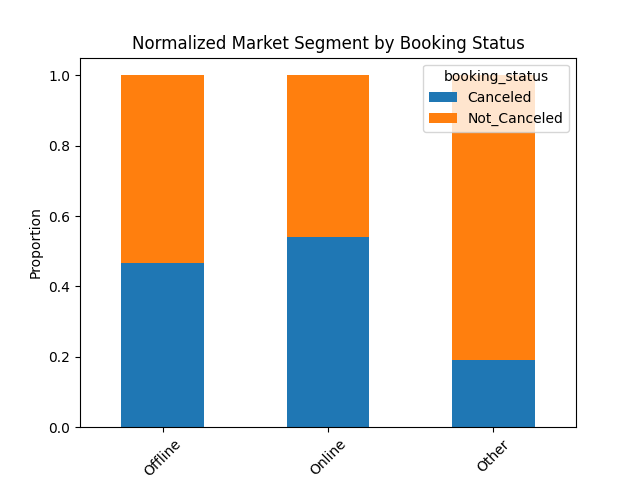

In [179]:
# Normalized barcharts
cross_tab = pd.crosstab(index=df['segment'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Market Segment by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()

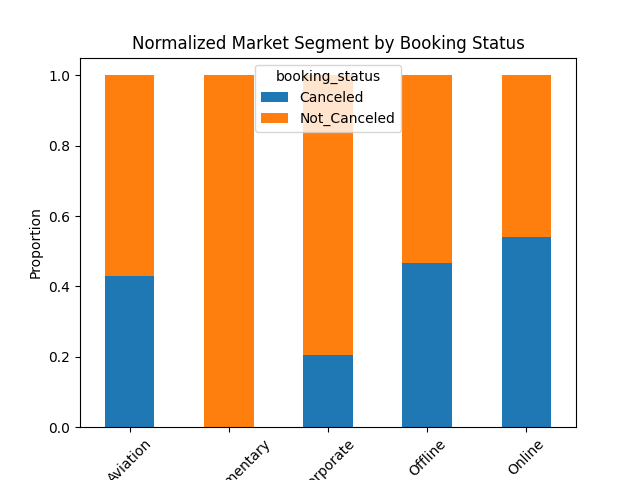

booking_status       Canceled  Not_Canceled
market_segment_type                        
Aviation             0.428571      0.571429
Complementary        0.000000      1.000000
Corporate            0.204301      0.795699
Offline              0.467372      0.532628
Online               0.541382      0.458618


In [180]:
## Original market segments
# Normalized barcharts
cross_tab = pd.crosstab(index=df['market_segment_type'], columns=df['booking_status'])
cross_tab = round(cross_tab.div(cross_tab.sum(0), axis=1)*100,1)
norm_cross_tab=cross_tab.div(cross_tab.sum(axis=1), axis=0)
norm_cross_tab.plot(kind='bar', stacked=True)
plt.title(f"Normalized Market Segment by Booking Status")
plt.xticks(rotation=45)
plt.ylabel('Proportion')
plt.show()
print(norm_cross_tab)

12. Special Requests as Binary

Most guests had at least 1 special request or none.

In [181]:
df['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

In [182]:
df['special_requests'] = df['no_of_special_requests'].apply(lambda x: 1 if x > 0 else 0)
df['special_requests']=df['special_requests'].astype('category')
df['special_requests'].value_counts()

0    19777
1    16498
Name: special_requests, dtype: int64

In [183]:
# Show all columns, including all added columns
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'cancellation_rate', 'day', 'month', 'year', 'full_arrival_date',
       'total_guests', 'total_nights', 'season', 'past_customer',
       'past_cancellation', 'total_price', 'meal_plan', 'room_type', 'segment',
       'special_requests'],
      dtype='object')

## Exploratory Data Analysis

In [184]:
#Get a list of numeric column names in a DataFrame.
def numeric_cols(data):
    num_cols = []
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            num_cols.append(col)
    return num_cols
numeric_columns = numeric_cols(df)
print(numeric_columns)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'cancellation_rate', 'day', 'total_guests', 'total_nights', 'total_price']


In [185]:
#Get a list of categorical column names in a DataFrame.
def category_columns(data):
  cat_cols = []
  for i in data:
    if data[i].dtype == 'object' or data[i].dtype == 'category':
      cat_cols.append(i)
  return cat_cols
categorical_columns = category_columns(df)
print(categorical_columns)


['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'arrival_year', 'arrival_month', 'market_segment_type', 'repeated_guest', 'booking_status', 'month', 'year', 'season', 'past_customer', 'past_cancellation', 'meal_plan', 'room_type', 'segment', 'special_requests']


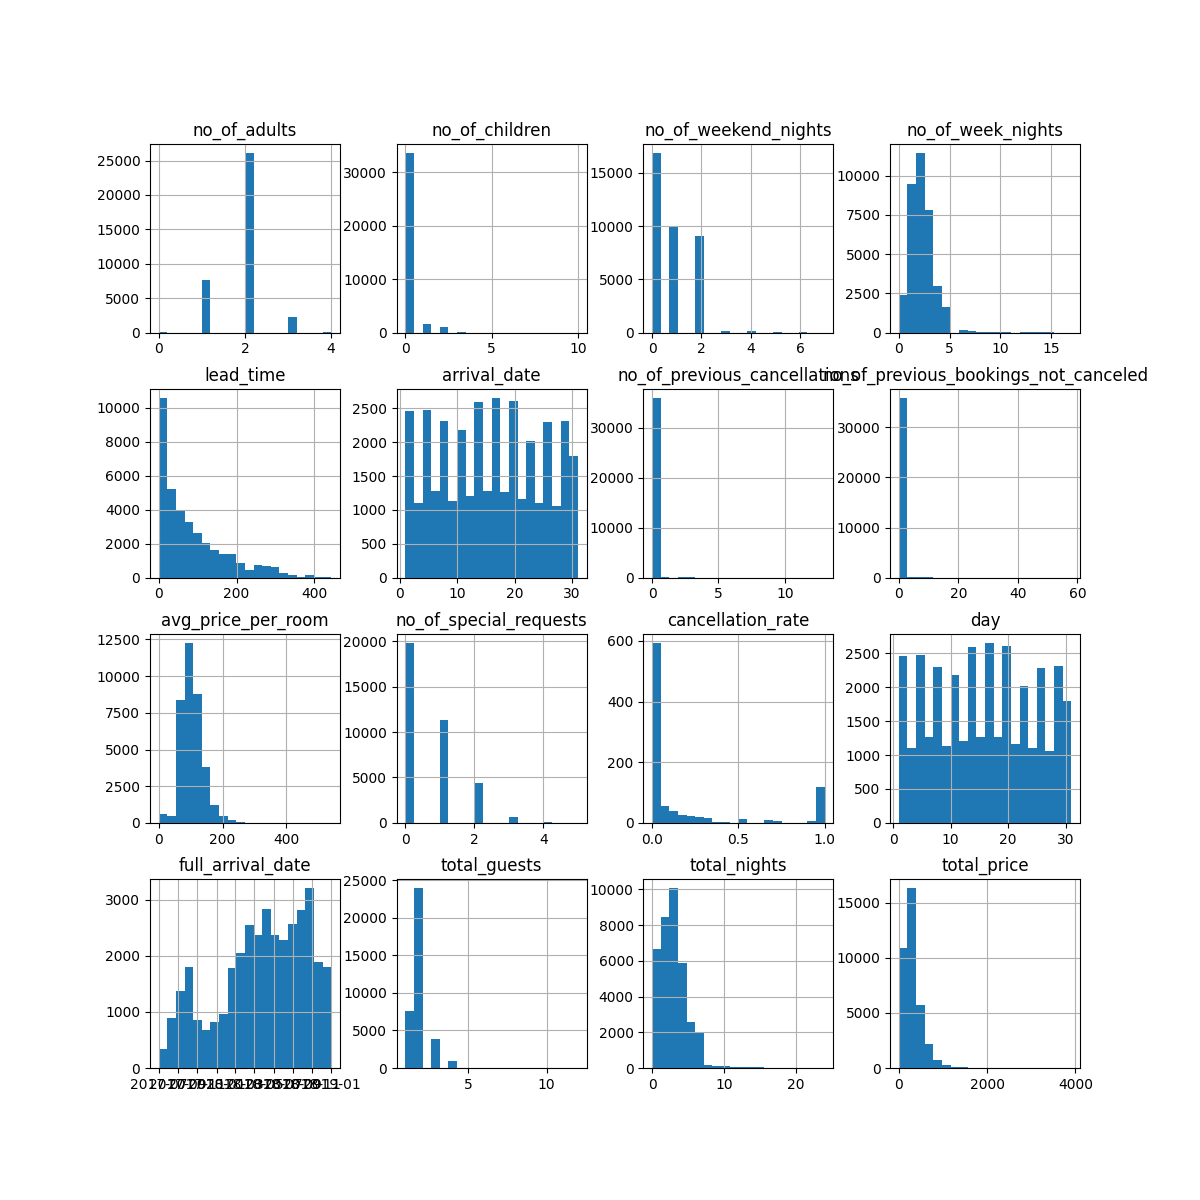

In [186]:
#Distributions for numerical variables
df.hist(figsize=(12,12),bins=20)
plt.show()

<ipython-input-187-c67fa12cc667>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)


<Axes: title={'center': 'Heat Map of Correlation Coefficients'}>

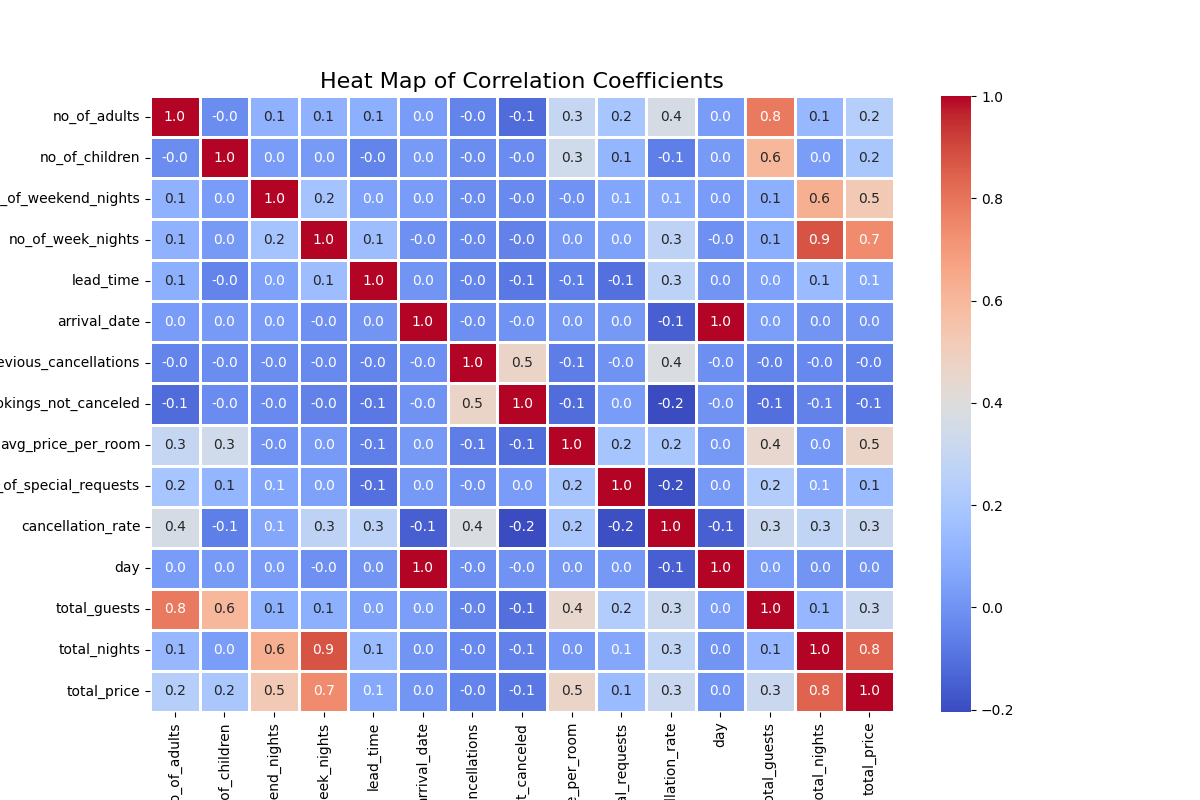

In [187]:
#Correlations between numerical variables
plt.figure(figsize=(12, 8))
plt.title("Heat Map of Correlation Coefficients", fontsize=16)
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.1f', linewidths = 1, annot = True)

In [188]:
df.corr()

<ipython-input-188-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


no_of_adults  no_of_children  \
no_of_adults                              1.000000       -0.019787   
no_of_children                           -0.019787        1.000000   
no_of_weekend_nights                      0.103316        0.029478   
no_of_week_nights                         0.105622        0.024398   
lead_time                                 0.097287       -0.047091   
arrival_date                              0.026338        0.025482   
no_of_previous_cancellations             -0.047426       -0.016390   
no_of_previous_bookings_not_canceled     -0.119166       -0.021189   
avg_price_per_room                        0.296886        0.337728   
no_of_special_requests                    0.189401        0.124486   
cancellation_rate                         0.363589       -0.060046   
day                                       0.026338        0.025482   
total_guests                              0.785371        0.603365   
total_nights                              0.133803        0.033644   
total_price                               0.241718        0.198209   

                                      no_of_weekend_nights  no_of_week_nights  \
no_of_adults                                      0.103316           0.105622   
no_of_children                                    0.029478           0.024398   
no_of_weekend_nights                              1.000000           0.179577   
no_of_week_nights                                 0.179577           1.000000   
lead_time                                         0.046595           0.149650   
arrival_date                                      0.027304          -0.009305   
no_of_previous_cancellations                     -0.020690          -0.030080   
no_of_previous_bookings_not_canceled             -0.026312          -0.049344   
avg_price_per_room                               -0.004525           0.022753   
no_of_special_requests                            0.060593           0.045994   
cancellation_rate                                 0.067632           0.266809   
day                                               0.027304          -0.009305   
total_guests                                      0.100658           0.099352   
total_nights                                      0.629339           0.877513   
total_price                                       0.525327           0.739939   

                                      lead_time  arrival_date  \
no_of_adults                           0.097287      0.026338   
no_of_children                        -0.047091      0.025482   
no_of_weekend_nights                   0.046595      0.027304   
no_of_week_nights                      0.149650     -0.009305   
lead_time                              1.000000      0.006479   
arrival_date                           0.006479      1.000000   
no_of_previous_cancellations          -0.045723     -0.012542   
no_of_previous_bookings_not_canceled  -0.078137     -0.001498   
avg_price_per_room                    -0.062596      0.017898   
no_of_special_requests                -0.101645      0.018352   
cancellation_rate                      0.261401     -0.149283   
day                                    0.006479      1.000000   
total_guests                           0.048441      0.036785   
total_nights                           0.140934      0.005960   
total_price                            0.076493      0.008446   

                                      no_of_previous_cancellations  \
no_of_adults                                             -0.047426   
no_of_children                                           -0.016390   
no_of_weekend_nights                                     -0.020690   
no_of_week_nights                                        -0.030080   
lead_time                                                -0.045723   
arrival_date                                             -0.012542   
no_of_previous_cancellations                              1.000000   
no_of_previous_book

In [189]:

# numeric columns for the box plot
numeric_columns = ['no_of_adults', 'no_of_children',
                    'total_guests',
                   'no_of_weekend_nights', 'no_of_week_nights',
                   #'required_car_parking_space', 'arrival_year',
                   'lead_time',
                   #'arrival_month', 'arrival_date', 'repeated_guest',
                   'no_of_previous_cancellations',
                   'no_of_previous_bookings_not_canceled',
                   'avg_price_per_room', 'no_of_special_requests',
                  'cancellation_rate', 'total_price']

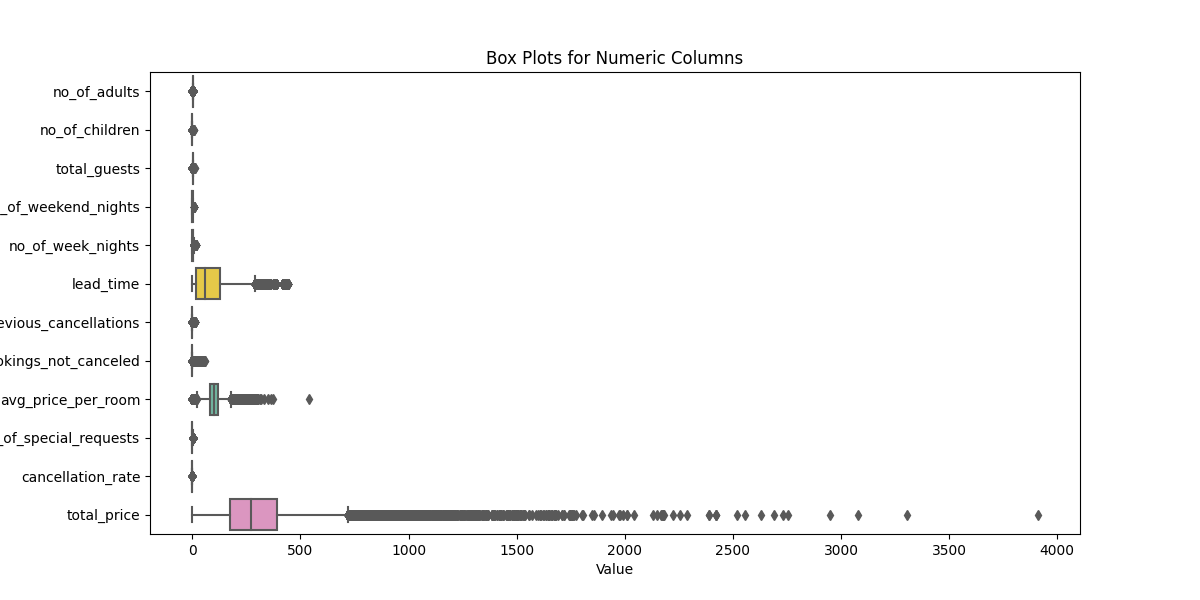

In [190]:
# box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numeric Columns")
plt.xlabel("Value")
plt.show()


In [191]:
df_cat = df[categorical_columns]
# Create cross-tab for categorical variables
for column in df_cat.columns:
    cross_tab = pd.crosstab(index=df_cat[column], columns=df['booking_status'])
    print(cross_tab)
    print("\n")

booking_status     Canceled  Not_Canceled
type_of_meal_plan                        
Meal Plan 1            8679         19156
Meal Plan 2            1506          1799
Meal Plan 3               1             4
Not Selected           1699          3431


booking_status              Canceled  Not_Canceled
required_car_parking_space                        
0                              11771         23380
1                                114          1010


booking_status      Canceled  Not_Canceled
room_type_reserved                        
Room_Type 1             9072         19058
Room_Type 2              228           464
Room_Type 3                2             5
Room_Type 4             2069          3988
Room_Type 5               72           193
Room_Type 6              406           560
Room_Type 7               36           122


booking_status  Canceled  Not_Canceled
arrival_year                          
2017                 961          5553
2018               10924         1

Checking for outlier

In [192]:
df.to_csv('hotel_reservations_for_modeling.csv',index=False)

## **Data Split and Preprocessing Pipeline**

In [193]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'cancellation_rate', 'day', 'month', 'year', 'full_arrival_date',
       'total_guests', 'total_nights', 'season', 'past_customer',
       'past_cancellation', 'total_price', 'meal_plan', 'room_type', 'segment',
       'special_requests'],
      dtype='object')

In [194]:
cats = ['market_segment_type', 'season']
bis = ['required_car_parking_space', 'meal_plan', 'room_type', 'repeated_guest','special_requests','past_customer']
nums = ['lead_time', 'total_price', 'total_guests','cancellation_rate']
all_vars = cats+bis+nums
print(f"Predictors used for modeling: \n", all_vars)

Predictors used for modeling: 
 ['market_segment_type', 'season', 'required_car_parking_space', 'meal_plan', 'room_type', 'repeated_guest', 'special_requests', 'past_customer', 'lead_time', 'total_price', 'total_guests', 'cancellation_rate']


In [195]:
# New outcome variable
#df['booking_status_binary']=pd.get_dummies(df['booking_status'],drop_first=True)
#df.booking_status_binary

In [196]:
df['book_binary'] = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

In [197]:
df['book_binary'].value_counts()

0    24390
1    11885
Name: book_binary, dtype: int64

In [198]:
cat_pipe = Pipeline([('encoder', OneHotEncoder())])
num_pipe = Pipeline([('variance', VarianceThreshold()),('skew_standardize', PowerTransformer())])
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats),('num', num_pipe, nums)]))
all_pipe


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['market_segment_type',
                                                   'season']),
                                                 ('num',
                                                  Pipeline(steps=[('variance',
                                                                   VarianceThreshold()),
                                                                  ('skew_standardize',
                                                                   PowerTransformer())]),
                                                  ['lead_time', 'total_price',
                                                   'total_guests',
                                                   'cancellation_rate'])]))])

## Creating a balanced training dataset

In [199]:
#Resplit data
X = df[all_vars]
y = df['book_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=.50, random_state=1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)

print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(27000, 12)
(27000,)
(4637, 12)
(4637,)
(4638, 12)
(4638,)


In [200]:
#Separate cancels and non-cancels
cancel = y_train[y_train == 1]
no_cancel = y_train[y_train == 0]

In [201]:
#Take random sample of 4929 non-cancellations
no_cancel_samp = no_cancel.sample(n = len(cancel), random_state = 1)

In [202]:
#Combine 4929 cancellations with sample of 4929 non-cancellations
balance_samp = pd.concat([cancel, no_cancel_samp])

In [203]:
#Verify balance of new training set
balance_samp.value_counts()

1    8858
0    8858
Name: book_binary, dtype: int64

In [204]:
#Merge new list of indices with the rest of features
balance_df = pd.merge(X_train, balance_samp[balance_samp.index.isin(X_train.index)],left_index=True, right_index=True)

In [205]:
#Create new input and output vectors for training data
X_train_bal = pd.DataFrame(balance_df.loc[:, balance_df.columns != 'book_binary'])
y_train_bal = balance_df[['book_binary']]

In [207]:
print(tr_bis_bal.columns)


Index(['required_car_parking_space', 'meal_plan', 'room_type',
       'repeated_guest', 'special_requests', 'past_customer'],
      dtype='object')


In [208]:
#Apply transformation pipeline to balanced training data
tr_nums_bal = pd.DataFrame(all_pipe.fit_transform(X_train_bal))
tr_bis_bal = X_train_bal[bis]
X_train_bal = pd.DataFrame({
    'Seg1': pd.array(tr_nums_bal[0]),
    'Seg2': pd.array(tr_nums_bal[1]),
    'Seg3': pd.array(tr_nums_bal[2]),
    'Season1': pd.array(tr_nums_bal[3]),
    'Season2': pd.array(tr_nums_bal[4]),
    'Season3': pd.array(tr_nums_bal[5]),
    'Season4': pd.array(tr_nums_bal[6]),
    'LeadTime' : pd.array(tr_nums_bal[7]),
    'TotalPrice' : pd.array(tr_nums_bal[8]),
    'Requests' : pd.array(tr_nums_bal[9]),
    'Guests' : pd.array(tr_nums_bal[10]),
    'Park' : pd.array(tr_bis_bal['required_car_parking_space']),
    'Meal' : pd.array(tr_bis_bal['meal_plan']),
    'Room' : pd.array(tr_bis_bal['room_type']),
    'RepeatGuest' : pd.array(tr_bis_bal['repeated_guest']),
    'PastCancel' : pd.array(tr_bis_bal['past_customer'])
})

In [209]:
X_train_bal['Park'] = X_train_bal['Park'].astype('int64')
X_train_bal['Meal'] = X_train_bal['Meal'].astype('int64')
X_train_bal['Room'] = X_train_bal['Room'].astype('int64')
X_train_bal['RepeatGuest'] = X_train_bal['RepeatGuest'].astype('int64')
X_train_bal['PastCancel'] = X_train_bal['PastCancel'].astype('int64')

In [210]:
X_train_bal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17716 entries, 0 to 17715
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Seg1         17716 non-null  float64
 1   Seg2         17716 non-null  float64
 2   Seg3         17716 non-null  float64
 3   Season1      17716 non-null  float64
 4   Season2      17716 non-null  float64
 5   Season3      17716 non-null  float64
 6   Season4      17716 non-null  float64
 7   LeadTime     17716 non-null  float64
 8   TotalPrice   17716 non-null  float64
 9   Requests     17716 non-null  float64
 10  Guests       17716 non-null  float64
 11  Park         17716 non-null  int64  
 12  Meal         17716 non-null  int64  
 13  Room         17716 non-null  int64  
 14  RepeatGuest  17716 non-null  int64  
 15  PastCancel   17716 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 2.2 MB


#### Dataset for logistic regression with one dummy variable removed for categories: Need C-1 dummies for linear models

In [211]:
X_train_log_bal = X_train_bal.drop(['Seg1','Season1'], axis = 1)

## Unbalanced data split for validation and testing

In [212]:
X = df[all_vars]
y = df['book_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 27000, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=15000, random_state=1)

In [213]:
X_train.shape, X_val.shape, X_test.shape

((15000, 12), (12000, 12), (9275, 12))

In [214]:
tr_bis = X_train[bis]
val_bis = X_val[bis]
test_bis = X_test[bis]

In [215]:
X_train = pd.DataFrame(all_pipe.fit_transform(X_train))
X_val = pd.DataFrame(all_pipe.fit_transform(X_val))
X_test = pd.DataFrame(all_pipe.fit_transform(X_test))
X_train.shape, X_val.shape, X_test.shape

((15000, 13), (12000, 13), (9275, 13))

In [217]:
X_train = pd.DataFrame({
    'Seg1': pd.array(X_train[0]),
    'Seg2': pd.array(X_train[1]),
    'Seg3': pd.array(X_train[2]),
    'Season1': pd.array(X_train[3]),
    'Season2': pd.array(X_train[4]),
    'Season3': pd.array(X_train[5]),
    'Season4': pd.array(X_train[6]),
    'LeadTime' : pd.array(X_train[7]),
    'TotalPrice' : pd.array(X_train[8]),
    'Requests' : pd.array(X_train[9]),
    'Guests' : pd.array(X_train[10]),
    'Park' : pd.array(tr_bis['required_car_parking_space']),
    'Meal' : pd.array(tr_bis['meal_plan']),
    'Room' : pd.array(tr_bis['room_type']),
    'RepeatGuest' : pd.array(tr_bis['repeated_guest']),
    'PastCancel' : pd.array(tr_bis['past_customer'])
})

In [218]:
X_val = pd.DataFrame({
    'Seg1': pd.array(X_val[0]),
    'Seg2': pd.array(X_val[1]),
    'Seg3': pd.array(X_val[2]),
    'Season1': pd.array(X_val[3]),
    'Season2': pd.array(X_val[4]),
    'Season3': pd.array(X_val[5]),
    'Season4': pd.array(X_val[6]),
    'LeadTime' : pd.array(X_val[7]),
    'TotalPrice' : pd.array(X_val[8]),
    'Requests' : pd.array(X_val[9]),
    'Guests' : pd.array(X_val[10]),
    'Park' : pd.array(val_bis['required_car_parking_space']),
    'Meal' : pd.array(val_bis['meal_plan']),
    'Room' : pd.array(val_bis['room_type']),
    'RepeatGuest' : pd.array(val_bis['repeated_guest']),
    'PastCancel' : pd.array(val_bis['past_customer'])
})

In [219]:
X_val['Park'] = X_val['Park'].astype('int64')
X_val['Meal'] = X_val['Meal'].astype('int64')
X_val['Room'] = X_val['Room'].astype('int64')
X_val['RepeatGuest'] = X_val['RepeatGuest'].astype('int64')
X_val['PastCancel'] = X_val['PastCancel'].astype('int64')

In [220]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Seg1         12000 non-null  float64
 1   Seg2         12000 non-null  float64
 2   Seg3         12000 non-null  float64
 3   Season1      12000 non-null  float64
 4   Season2      12000 non-null  float64
 5   Season3      12000 non-null  float64
 6   Season4      12000 non-null  float64
 7   LeadTime     12000 non-null  float64
 8   TotalPrice   12000 non-null  float64
 9   Requests     12000 non-null  float64
 10  Guests       12000 non-null  float64
 11  Park         12000 non-null  int64  
 12  Meal         12000 non-null  int64  
 13  Room         12000 non-null  int64  
 14  RepeatGuest  12000 non-null  int64  
 15  PastCancel   12000 non-null  int64  
dtypes: float64(11), int64(5)
memory usage: 1.5 MB


In [222]:
X_test = pd.DataFrame({
    'Seg1': pd.array(X_test[0]),
    'Seg2': pd.array(X_test[1]),
    'Seg3': pd.array(X_test[2]),
    'Season1': pd.array(X_test[3]),
    'Season2': pd.array(X_test[4]),
    'Season3': pd.array(X_test[5]),
    'Season4': pd.array(X_test[6]),
    'LeadTime' : pd.array(X_test[7]),
    'TotalPrice' : pd.array(X_test[8]),
    'Requests' : pd.array(X_test[9]),
    'Guests' : pd.array(X_test[10]),
    'Park' : pd.array(test_bis['required_car_parking_space']),
    'Meal' : pd.array(test_bis['meal_plan']),
    'Room' : pd.array(test_bis['room_type']),
    'RepeatGuest' : pd.array(test_bis['repeated_guest']),
    'PastCancel' : pd.array(test_bis['past_customer'])
})

In [223]:
X_test['Park'] = X_test['Park'].astype('int64')
X_test['Meal'] = X_test['Meal'].astype('int64')
X_test['Room'] = X_test['Room'].astype('int64')
X_test['RepeatGuest'] = X_test['RepeatGuest'].astype('int64')
X_test['PastCancel'] = X_test['PastCancel'].astype('int64')

### Predictors for logistic regression with one of the dummies removed: need C-1 dummies for linear models

In [224]:
X_train_log = X_train.drop(['Seg1','Season1'], axis = 1)
X_val_log = X_val.drop(['Seg1','Season1'], axis = 1)
X_test_log = X_test.drop(['Seg1','Season1'], axis = 1)

# Model Training

## L2 penalized logistic regression on unbalanced data

In [225]:
log_l2 = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1).fit(X_train_log, y_train.values.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [226]:
log_l2.coef_

array([[-0.03319748,  0.08234794,  0.53691495,  0.06329509,  0.21571722,
         0.17606378, -0.45519581,  0.99230622,  0.2076637 , -0.35633549,
        -0.22539833,  0.01026066, -0.11452777, -0.09268258]])

## L2 penalized logistic regression with balanced data

In [227]:
log_l2_bal = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1).fit(X_train_log_bal, y_train_bal.values.ravel())

In [228]:
log_l2_bal.coef_

array([[-1.10441791,  0.76631479,  0.88527111,  0.07196113,  0.29973176,
         0.21349674, -0.59169837,  1.11568345,  0.18320237, -1.51560405,
        -0.27865643,  0.00610738, -0.95268105, -0.95151347]])

## KNN Classifier

In [229]:
knn_results = []
for k in range (1, 9):
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train_bal, y_train_bal.values.ravel())
    knn_results.append({
        'k': k,
        'Accuracy': accuracy_score(y_val.values.ravel(), knn_mod.predict(X_val))
    })

knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

In [230]:
knn_results

k  Accuracy
0  1  0.682250
1  2  0.723250
2  3  0.704583
3  4  0.738417
4  5  0.716917
5  6  0.736750
6  7  0.719833
7  8  0.742083

In [231]:
knn = KNeighborsClassifier(n_neighbors = 3).fit(X_train_bal, y_train_bal.values.ravel())

## Neural Network Classifier

In [232]:
nn = MLPClassifier(hidden_layer_sizes=(6,3), activation = 'logistic', max_iter = 500, solver = 'lbfgs', random_state=1)
nn.fit(X_train_bal, y_train_bal.values.ravel())

MLPClassifier(activation='logistic', hidden_layer_sizes=(6, 3), max_iter=500,
              random_state=1, solver='lbfgs')

## Boosted Tree Classifier

In [233]:
param_grid = {
    'max_depth' : [9,10,11,12,13],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [17,18,19,20,21],
}

tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
tree_search.fit(X_train_bal, y_train_bal.values.ravel())
tree = tree_search.best_params_

In [234]:
tree

{'learning_rate': 0.1, 'max_depth': 11, 'n_estimators': 21}

# Model Performance with Unbalanced Validation Data

## Log reg with unbalanced training

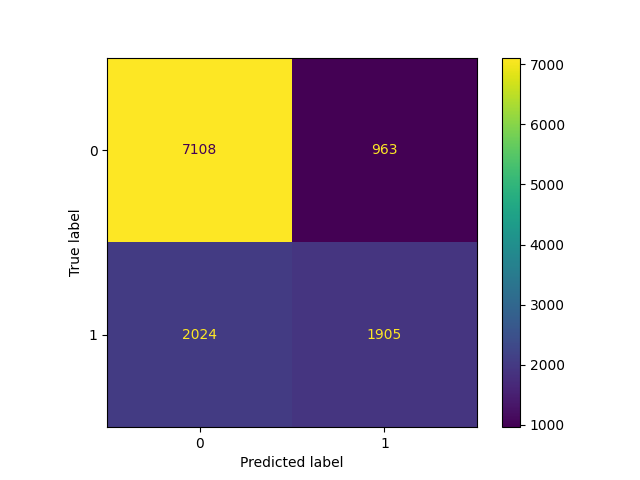

In [235]:
#Confusion matrix for logistic regression
log_cm = confusion_matrix(y_true = y_val, y_pred = log_l2.predict(X_val_log), labels = log_l2.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=log_l2.classes_)
log_disp.plot()
plt.show()

In [236]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_val, log_l2.predict(X_val_log))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(83.04722222222227, 0.5, 'True Positive Rate')

In [237]:
#Sensitivity, specificity, and accuracy for log reg with unbalanced data
#Very low
log_sens = sensitivity_score(y_val, log_l2.predict(X_val_log))
log_spec = specificity_score(y_val, log_l2.predict(X_val_log))
log_acc = accuracy_score(y_val, log_l2.predict(X_val_log))
log_sens, log_spec, log_acc

(0.48485619750572667, 0.8806839301201834, 0.7510833333333333)

## Log reg with balanced data

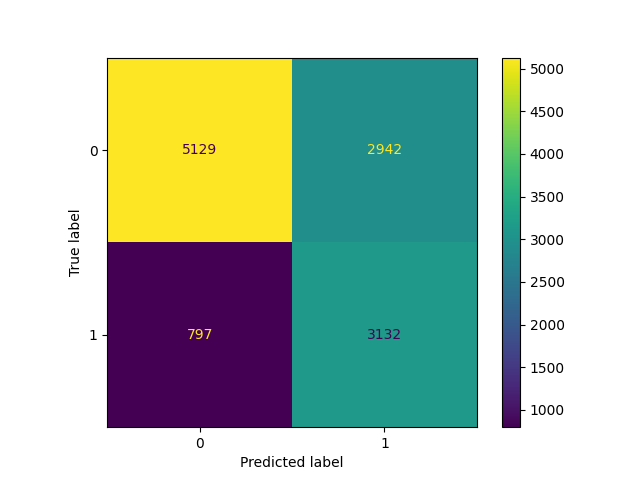

In [238]:
#Confusion matrix for logistic regression balanced
log_cm_bal = confusion_matrix(y_true = y_val, y_pred = log_l2_bal.predict(X_val_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
plt.show()

In [239]:
#ROC curve for logistic regression
fpr, tpr, thresholds = roc_curve(y_val, log_l2_bal.predict(X_val_log))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(83.04722222222227, 0.5, 'True Positive Rate')

In [240]:
#Sensitivity, specificity, and accuracy for log reg with balanced data
#Much improved
log_sens_bal = sensitivity_score(y_val, log_l2_bal.predict(X_val_log))
log_spec_bal = specificity_score(y_val, log_l2_bal.predict(X_val_log))
log_acc_bal = accuracy_score(y_val, log_l2_bal.predict(X_val_log))
log_sens_bal, log_spec_bal, log_acc_bal

(0.7971494018834309, 0.635485070003717, 0.6884166666666667)

## Decision Tree

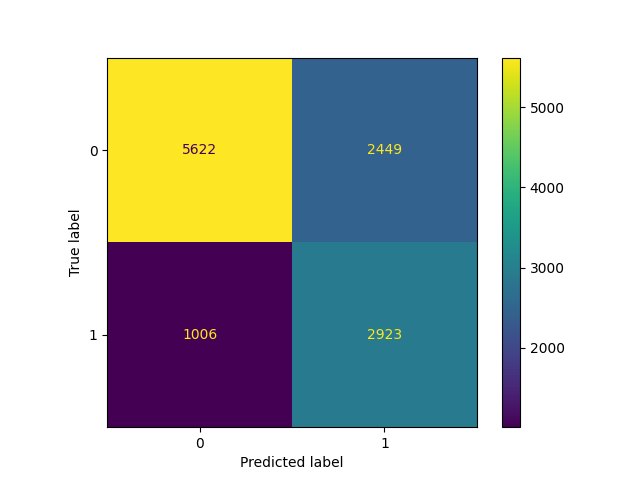

In [241]:
#Confusion matrix for logistic regression balanced
tree_cm_bal = confusion_matrix(y_true = y_val, y_pred = tree_search.predict(X_val), labels = tree_search.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_search.classes_)
tree_disp_bal.plot()
plt.show()

In [242]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree_sens_bal = sensitivity_score(y_val, tree_search.predict(X_val))
tree_spec_bal = specificity_score(y_val, tree_search.predict(X_val))
tree_acc_bal = accuracy_score(y_val, tree_search.predict(X_val))
tree_sens_bal, tree_spec_bal, tree_acc_bal

(0.7439552048867396, 0.6965679593606741, 0.7120833333333333)

## KNN

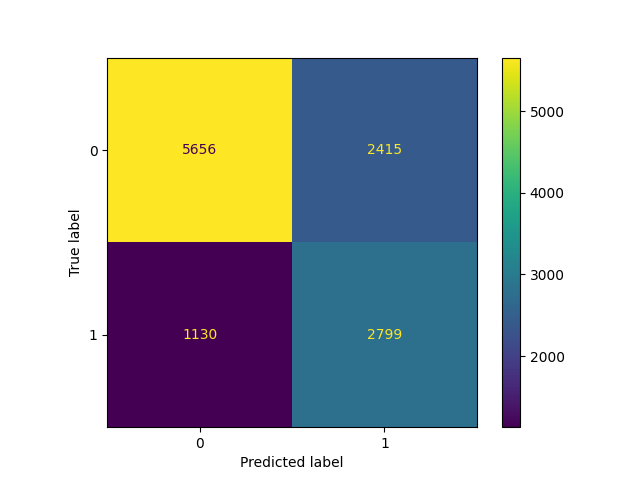

In [243]:
knn_cm_bal = confusion_matrix(y_true = y_val, y_pred = knn.predict(X_val), labels = knn.classes_)
knn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= knn_cm_bal, display_labels=knn.classes_)
knn_disp_bal.plot()
warnings.filterwarnings('ignore')
plt.show()

In [244]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced data
#Much improved
knn_sens_bal = sensitivity_score(y_val, knn.predict(X_val))
knn_spec_bal = specificity_score(y_val, knn.predict(X_val))
knn_acc_bal = accuracy_score(y_val, knn.predict(X_val))
warnings.filterwarnings('ignore')
knn_sens_bal, knn_spec_bal, knn_acc_bal

(0.712395011453296, 0.7007805724197745, 0.7045833333333333)

## Neural network

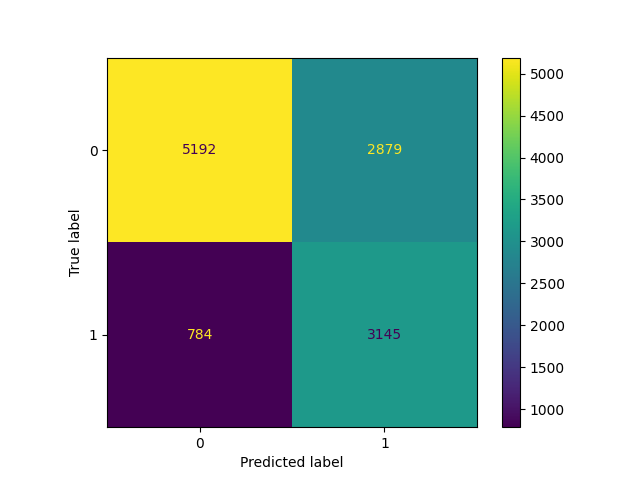

In [245]:
nn_cm_bal = confusion_matrix(y_true = y_val, y_pred = nn.predict(X_val), labels = nn.classes_)
nn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= nn_cm_bal, display_labels=nn.classes_)
nn_disp_bal.plot()
plt.show()

In [246]:
#Sensitivity, specificity, and accuracy for neural net
nn_sens = sensitivity_score(y_val, nn.predict(X_val))
nn_spec = specificity_score(y_val, nn.predict(X_val))
nn_acc = accuracy_score(y_val, nn.predict(X_val))
nn_sens, nn_spec, nn_acc

(0.8004581318401629, 0.6432907942014621, 0.69475)

# Top Two Models: Logistic Regression and Neural Network. Compare performance on test set. Calculate AIC scores.

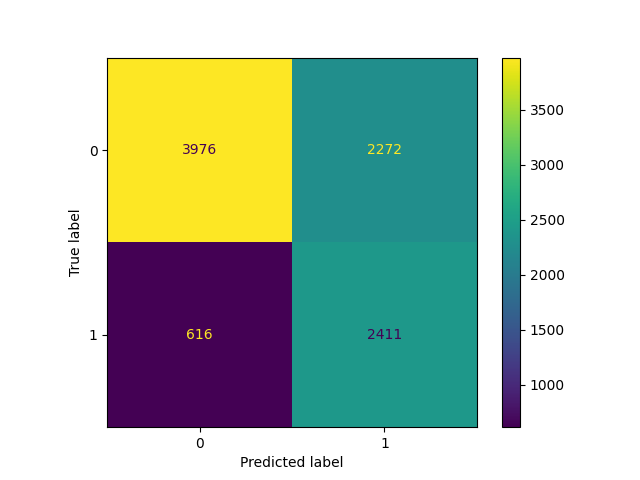

In [247]:
#Confusion matrix for logistic regression balanced
log_cm_bal = confusion_matrix(y_true = y_test, y_pred = log_l2_bal.predict(X_test_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
plt.show()

In [248]:
log_sens_bal = sensitivity_score(y_test, log_l2_bal.predict(X_test_log))
log_spec_bal = specificity_score(y_test, log_l2_bal.predict(X_test_log))
log_acc_bal = accuracy_score(y_test, log_l2_bal.predict(X_test_log))
log_sens_bal, log_spec_bal, log_acc_bal

(0.7964981830194913, 0.6363636363636364, 0.6886253369272237)

In [ ]:
#AIC score

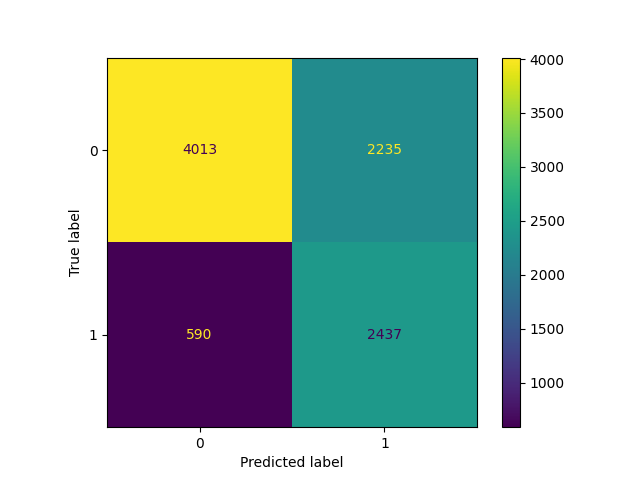

In [249]:
nn_cm_bal = confusion_matrix(y_true = y_test, y_pred = nn.predict(X_test), labels = nn.classes_)
nn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= nn_cm_bal, display_labels=nn.classes_)
nn_disp_bal.plot()
plt.show()

In [250]:
nn_sens_bal = sensitivity_score(y_test, nn.predict(X_test))
nn_spec_bal = specificity_score(y_test, nn.predict(X_test))
nn_acc_bal = accuracy_score(y_test, nn.predict(X_test))
nn_sens_bal, nn_spec_bal, nn_acc_bal

(0.8050875454245128, 0.6422855313700384, 0.6954177897574124)

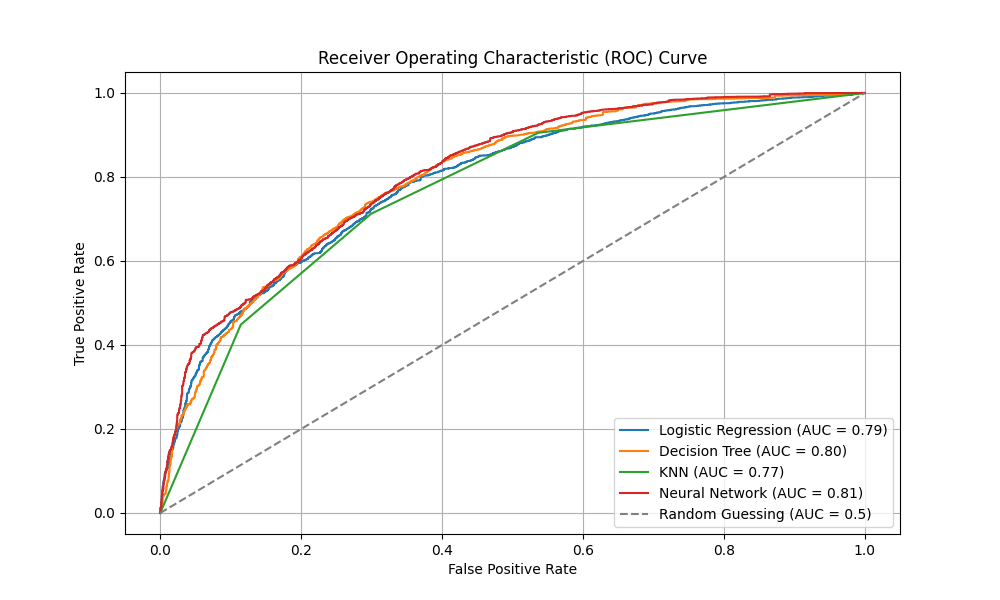

In [258]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curves and AUC scores for each model
fpr_log, tpr_log, thresholds_log = roc_curve(y_val, log_l2.predict_proba(X_val_log)[:, 1])
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_val, tree_search.predict_proba(X_val)[:, 1])
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, knn.predict_proba(X_val)[:, 1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_val, nn.predict_proba(X_val)[:, 1])

# Calculate AUC scores for each model
auc_log = roc_auc_score(y_val, log_l2.predict_proba(X_val_log)[:, 1])
auc_tree = roc_auc_score(y_val, tree_search.predict_proba(X_val)[:, 1])
auc_knn = roc_auc_score(y_val, knn.predict_proba(X_val)[:, 1])
auc_nn = roc_auc_score(y_val, nn.predict_proba(X_val)[:, 1])

# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {auc_knn:.2f})')
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')

# Plot the ROC curve for random guessing (AUC = 0.5)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing (AUC = 0.5)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

Support for third party widgets will remain active for the duration of the session. To disable support:

In [260]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score


# L2 Penalized Logistic Regression on Unbalanced Data:
y_pred_log_l2_test = log_l2.predict(X_test_log)

# Calculate accuracy
accuracy_log_l2_test = accuracy_score(y_test, y_pred_log_l2_test)

# Generate a classification report
report_log_l2_test = classification_report(y_test, y_pred_log_l2_test)

# Calculate ROC-AUC score
roc_auc_log_l2_test = roc_auc_score(y_test, log_l2.predict_proba(X_test_log)[:, 1])

# Calculate the confusion matrix
conf_matrix_log_l2_test = confusion_matrix(y_test, y_pred_log_l2_test)

# Calculate sensitivity and specificity
# Sensitivity (True Positive Rate)
sensitivity_log_l2_test = conf_matrix_log_l2_test[1, 1] / (conf_matrix_log_l2_test[1, 0] + conf_matrix_log_l2_test[1, 1])
# Specificity (True Negative Rate)
specificity_log_l2_test = conf_matrix_log_l2_test[0, 0] / (conf_matrix_log_l2_test[0, 0] + conf_matrix_log_l2_test[0, 1])

# Display results
print("L2 Penalized Logistic Regression on Unbalanced Data (Test Set):")
print(f"Accuracy: {accuracy_log_l2_test:.2f}")
print("Classification Report:\n", report_log_l2_test)
print(f"ROC-AUC Score: {roc_auc_log_l2_test:.2f}")
print(f"Sensitivity: {sensitivity_log_l2_test:.2f}")
print(f"Specificity: {specificity_log_l2_test:.2f}")

L2 Penalized Logistic Regression on Unbalanced Data (Test Set):
Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.88      0.83      6248
           1       0.67      0.49      0.57      3027

    accuracy                           0.75      9275
   macro avg       0.72      0.69      0.70      9275
weighted avg       0.74      0.75      0.74      9275

ROC-AUC Score: 0.79
Sensitivity: 0.49
Specificity: 0.88


In [262]:
# Decision Tree Classifier with Balanced Data:
y_pred_tree_test = tree_search.predict(X_test)

# Calculate accuracy
accuracy_tree_test = accuracy_score(y_test, y_pred_tree_test)

# Generate a classification report
report_tree_test = classification_report(y_test, y_pred_tree_test)

# Calculate ROC-AUC score
roc_auc_tree_test = roc_auc_score(y_test, tree_search.predict_proba(X_test)[:, 1])

# Calculate the confusion matrix
conf_matrix_tree_test = confusion_matrix(y_test, y_pred_tree_test)

# Calculate sensitivity and specificity
# Sensitivity (True Positive Rate)
sensitivity_tree_test = conf_matrix_tree_test[1, 1] / (conf_matrix_tree_test[1, 0] + conf_matrix_tree_test[1, 1])
# Specificity (True Negative Rate)
specificity_tree_test = conf_matrix_tree_test[0, 0] / (conf_matrix_tree_test[0, 0] + conf_matrix_tree_test[0, 1])

# Display results
print("\nDecision Tree Classifier with Balanced Data (Test Set):")
print(f"Accuracy: {accuracy_tree_test:.2f}")
print("Classification Report:\n", report_tree_test)
print(f"ROC-AUC Score: {roc_auc_tree_test:.2f}")
print(f"Sensitivity: {sensitivity_tree_test:.2f}")
print(f"Specificity: {specificity_tree_test:.2f}")



Decision Tree Classifier with Balanced Data (Test Set):
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.68      0.75      6248
           1       0.53      0.73      0.61      3027

    accuracy                           0.70      9275
   macro avg       0.68      0.70      0.68      9275
weighted avg       0.74      0.70      0.71      9275

ROC-AUC Score: 0.78
Sensitivity: 0.73
Specificity: 0.68


In [263]:
# K-Nearest Neighbors (KNN) Classifier with Balanced Data:
y_pred_knn_test = knn.predict(X_test)

# Calculate accuracy
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)

# Generate a classification report
report_knn_test = classification_report(y_test, y_pred_knn_test)

# Calculate ROC-AUC score
roc_auc_knn_test = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Calculate the confusion matrix
conf_matrix_knn_test = confusion_matrix(y_test, y_pred_knn_test)

# Calculate sensitivity and specificity
# Sensitivity (True Positive Rate)
sensitivity_knn_test = conf_matrix_knn_test[1, 1] / (conf_matrix_knn_test[1, 0] + conf_matrix_knn_test[1, 1])
# Specificity (True Negative Rate)
specificity_knn_test = conf_matrix_knn_test[0, 0] / (conf_matrix_knn_test[0, 0] + conf_matrix_knn_test[0, 1])

# Display results
print("\nK-Nearest Neighbors (KNN) Classifier with Balanced Data (Test Set):")
print(f"Accuracy: {accuracy_knn_test:.2f}")
print("Classification Report:\n", report_knn_test)
print(f"ROC-AUC Score: {roc_auc_knn_test:.2f}")
print(f"Sensitivity: {sensitivity_knn_test:.2f}")
print(f"Specificity: {specificity_knn_test:.2f}")


K-Nearest Neighbors (KNN) Classifier with Balanced Data (Test Set):
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.69      0.75      6248
           1       0.52      0.68      0.59      3027

    accuracy                           0.69      9275
   macro avg       0.67      0.69      0.67      9275
weighted avg       0.72      0.69      0.70      9275

ROC-AUC Score: 0.74
Sensitivity: 0.68
Specificity: 0.69


In [264]:
# Neural Network (MLP) Classifier:
y_pred_nn_test = nn.predict(X_test)

# Calculate accuracy
accuracy_nn_test = accuracy_score(y_test, y_pred_nn_test)

# Generate a classification report
report_nn_test = classification_report(y_test, y_pred_nn_test)

# Calculate ROC-AUC score
roc_auc_nn_test = roc_auc_score(y_test, nn.predict_proba(X_test)[:, 1])

# Calculate the confusion matrix
conf_matrix_nn_test = confusion_matrix(y_test, y_pred_nn_test)

# Calculate sensitivity and specificity
# Sensitivity (True Positive Rate)
sensitivity_nn_test = conf_matrix_nn_test[1, 1] / (conf_matrix_nn_test[1, 0] + conf_matrix_nn_test[1, 1])
# Specificity (True Negative Rate)
specificity_nn_test = conf_matrix_nn_test[0, 0] / (conf_matrix_nn_test[0, 0] + conf_matrix_nn_test[0, 1])

# Display results
print("\nNeural Network (MLP) Classifier (Test Set):")
print(f"Accuracy: {accuracy_nn_test:.2f}")
print("Classification Report:\n", report_nn_test)
print(f"ROC-AUC Score: {roc_auc_nn_test:.2f}")
print(f"Sensitivity: {sensitivity_nn_test:.2f}")
print(f"Specificity: {specificity_nn_test:.2f}")



Neural Network (MLP) Classifier (Test Set):
Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.64      0.74      6248
           1       0.52      0.81      0.63      3027

    accuracy                           0.70      9275
   macro avg       0.70      0.72      0.69      9275
weighted avg       0.76      0.70      0.70      9275

ROC-AUC Score: 0.81
Sensitivity: 0.81
Specificity: 0.64


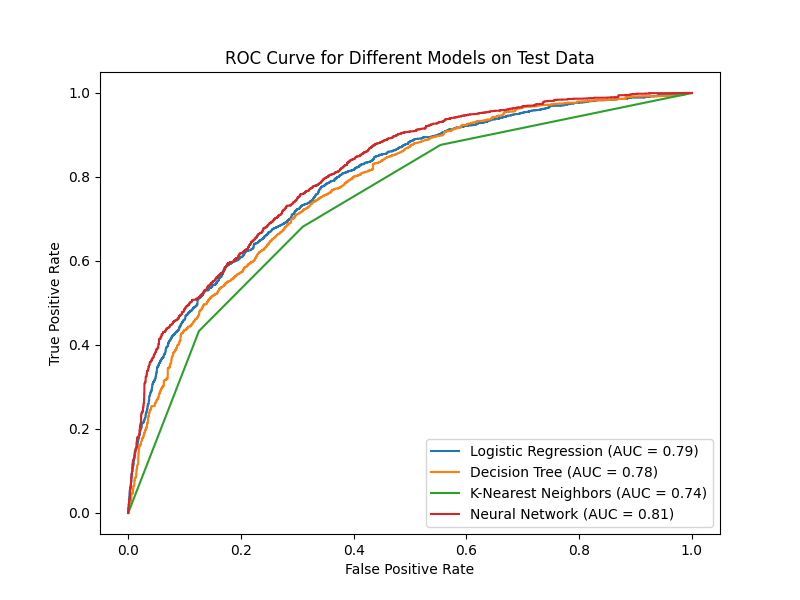

In [270]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Logistic Regression ROC curve
fpr_log_l2, tpr_log_l2, thresholds_log_l2 = roc_curve(y_test, log_l2.predict_proba(X_test_log)[:, 1])
roc_auc_log_l2 = roc_auc_score(y_test, log_l2.predict_proba(X_test_log)[:, 1])

# Decision Tree ROC curve
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test, tree_search.predict_proba(X_test)[:, 1])
roc_auc_tree = roc_auc_score(y_test, tree_search.predict_proba(X_test)[:, 1])

# K-Nearest Neighbors (KNN) ROC curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
roc_auc_knn = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Neural Network ROC curve
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, nn.predict_proba(X_test)[:, 1])
roc_auc_nn = roc_auc_score(y_test, nn.predict_proba(X_test)[:, 1])

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))

# Logistic Regression ROC curve
plt.plot(fpr_log_l2, tpr_log_l2, label=f'Logistic Regression (AUC = {roc_auc_log_l2:.2f})')
# Decision Tree ROC curve
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {roc_auc_tree:.2f})')
# K-Nearest Neighbors (KNN) ROC curve
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_knn:.2f})')
# Neural Network ROC curve
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Models on Test Data')
plt.legend(loc='lower right')

# Show the plot
plt.show()





1. **L2 Penalized Logistic Regression (Unbalanced Data):**
   - Accuracy: 0.75
   - ROC-AUC Score: 0.79
   - Sensitivity: 0.49
   - Specificity: 0.88

2. **Decision Tree Classifier (Balanced Data):**
   - Accuracy: 0.70
   - ROC-AUC Score: 0.78
   - Sensitivity: 0.73
   - Specificity: 0.68

3. **K-Nearest Neighbors (KNN) Classifier (Balanced Data):**
   - Accuracy: 0.69
   - ROC-AUC Score: 0.74
   - Sensitivity: 0.68
   - Specificity: 0.69

4. **Neural Network (MLP) Classifier:**
   - Accuracy: 0.70
   - ROC-AUC Score: 0.81
   - Sensitivity: 0.81
   - Specificity: 0.64

Based on these metrics, you can make the following observations:

- The logistic regression model on unbalanced data achieved the highest specificity (0.88) but had lower sensitivity (0.49).
- The decision tree classifier with balanced data achieved a balanced sensitivity (0.73) and specificity (0.68).
- The KNN classifier with balanced data showed balanced performance in sensitivity (0.68) and specificity (0.69).
- The neural network (MLP) classifier achieved the highest sensitivity (0.81) but had lower specificity (0.64).

After careful evaluation of the performance metrics and considering the specific objectives of our project, I have chosen the Neural Network (MLP) Classifier as the best model. The Neural Network exhibited the highest sensitivity of 0.81, which is of paramount importance for our application, where correctly identifying positive cases is a priority. While it displayed a slightly lower specificity of 0.64, the trade-off between sensitivity and specificity is deemed acceptable in our context. Furthermore, Neural Networks have the inherent capability to capture intricate patterns in the data, making them well-suited for a wide range of complex problems. Therefore, I believe that the Neural Network model aligns most closely with our project's objectives and represents the best choice for our predictive modeling task.

# References
 * https://saturncloud.io/blog/pandas-seaborn-countplot-from-several-columns/